# Proyecto integrador - TC5035

## Christopher Valdez Cantu  #A01793549


In [1]:
#pip install clean-text

In [2]:
from cleantext import clean
from sklearn.feature_extraction.text import TfidfVectorizer
import ftfy
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from datetime import datetime

# Objetivos del proyecto

Para este proyecto se utilizarán cuatro conjuntos de datos, uno general y tres específicos. El primero será abordado en la primera parte, y los otros tres se tratarán en la segunda parte. Los cuatro conjuntos de datos se recopilaron utilizando web scraping para obtener un listado de productos rentables en Amazon. Todos los productos en el conjunto de datos han tenido un buen desempeño en ventas y buenas reseñas.

El primer conjunto de datos incluye productos de todos los sectores, y el objetivo de esta primera parte del proyecto es identificar al menos seis nichos rentables dentro de él.

Por otro lado, los otros tres conjuntos de datos están más enfocados en productos específicos de cada industria. En estos casos, el objetivo es encontrar al menos cuatro nichos rentables, más específicos, dentro de cada una de estas industrias.


# Parte 1 - Busqueda General

## Lectura de datos

In [3]:

# Leer el archivo CSV
Busqueda_1 = pd.read_csv('Data/Busqueda_1.csv', encoding='ISO-8859-1')  # Usamos la codificación ISO-8859-1 que es común para archivos CSV con errores de codificación

Busqueda_1

,ASIN,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Fees,Net,Rank,Reviews,LQS,Sellers,Date First Available,Buy Box Owner,Rating,Dimensions,Product Tier,Weight
0,B0BY7R11JB,Rebar-Stakes-12-Inch-Galvanized J Hook Rebar ...,QNLONG,"Patio, Lawn & Garden","$15,001.20","1,080",$13.89,N.A.,N.A.,"1,381",43.000000,6,1,05/27/2023,Amazon,4.8,N.A.,N.A.,N.A.
1,B0BYZPBF3L,CozeCube Light Beige Bath mats for Bathroom No...,CozeCube,Home & Kitchen,"$15,001.35","1,365",$24.99,N.A.,N.A.,"23,336",43.135135,7,2,03/19/2023,taianshiyujiadianzishangmaoyouxiangongsi,3.9,N.A.,N.A.,N.A.
2,B0C3GRT1Q3,PURPLE LADYBUG Scratch Art for Kids - Party Fa...,PURPLE LADYBUG,Toys & Games,"$15,004.31","1,669",$8.99,N.A.,N.A.,"7,824",5.000000,6,1,06/28/2023,Amazon,5.0,N.A.,N.A.,N.A.
3,B0CL9X56BK,Cordless Long Handle Replacement Brush Heads f...,Bilim,Health & Household,"$15,004.98","1,502",$9.99,N.A.,N.A.,N.A.,21.000000,5,1,06/18/2023,Amazon,5.0,N.A.,N.A.,N.A.
4,B0C1FY79XG,Fitwarm Cheerleader Dog Costume Sporty Cheer ...,Fitwarm,Pet Supplies,"$15,004.99","1,001",$14.99,$5.79,$9.20,"5,053",30.000000,6,1,04/03/2023,Amazon,4.3,"12.87"" x 9.80"" x 0.87""",Large standard-size,2.4 lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,B0CHMK5L2R,INPAKSA Women's Slippers Platform Mini Boots S...,INPAKSA,"Clothing, Shoes & Jewelry","$520,217.72","11,314",$45.98,N.A.,N.A.,"1,113",32.000000,7,1,09/07/2023,INPAKSAS,3.9,N.A.,N.A.,N.A.
10200,B07QQX6JVL,SEPARO Spandex Table Cover Fitted Rectangular ...,SEPARO,Kitchen & Dining,"$520,702.56","9,648",$53.97,N.A.,N.A.,524,2.000000,7,1,06/24/2023,Amazon,5.0,N.A.,N.A.,N.A.
10201,B0BLJJNFYN,HYC00 Travel Duffel Bag Sports Tote Gym/Should...,HYC00,"Clothing, Shoes & Jewelry","$520,906.40","13,360",$38.99,$12.58,$26.41,"74,253",12.000000,7,3,12/17/2022,Amazon Warehouse,4.4,"12.99"" x 10.28"" x 4.33""",Large standard-size,2.05 lbs
10202,B0CFKGY6XH,FREE VILLAGE Ice Makers Countertop Nugget Cube...,FREE VILLAGE,Appliances,"$521,539.94","2,006",$259.99,N.A.,N.A.,"2,907",10.000000,7,1,08/15/2023,progressUS,3.5,"11.30"" x 8.66"" x 12.68""",N.A.,N.A.


## Limpieza de los datos

In [4]:
Busqueda_1 = Busqueda_1.drop_duplicates(subset='ASIN')

In [4]:
Busqueda_1 = Busqueda_1.drop(columns=['ASIN', 'Rank', 'Fees', 'Net', 'Dimensions', 'Product Tier', 'Weight', 'Buy Box Owner' ])

In [5]:
import pandas as pd
import ftfy

# Función para limpiar texto
def clean_text(text):
    fixed_text = ftfy.fix_text(text)
    cleaned_text = clean(fixed_text, 
                         fix_unicode=True,
                         to_ascii=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=False,
                         no_digits=False,
                         no_currency_symbols=True,
                         no_punct=True,
                         replace_with_punct="",
                         lang="en")
    return cleaned_text

text_columns = ['Product Name', 'Brand', 'Category']

# Verificar valores faltantes
for col in text_columns:
    Busqueda_1[col] = Busqueda_1[col].astype(str).apply(clean_text)

    
Busqueda_1.replace("N.A.", np.nan, inplace=True)
Busqueda_1.replace("na", np.nan, inplace=True)


In [6]:
# Verificar valores faltantes
missing_values = Busqueda_1.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name             0
Brand                    3
Category                 0
Est. Monthly Revenue    63
Est. Monthly Sales      63
Price                    0
Reviews                  0
LQS                      0
Sellers                  0
Date First Available     0
Rating                   0
dtype: int64


## Cambiar tipos de datos

In [8]:
print(Busqueda_1.dtypes)

Product Name             object
Brand                    object
Category                 object
Est. Monthly Revenue     object
Est. Monthly Sales       object
Price                    object
Reviews                 float64
LQS                       int64
Sellers                   int64
Date First Available     object
Rating                  float64
dtype: object


In [10]:
Busqueda_1['Rating'] = Busqueda_1['Rating'].round(2)
Busqueda_1 = Busqueda_1.astype({'Reviews': 'float64', 'Reviews': 'int64'})

Busqueda_1['Est. Monthly Revenue'] = Busqueda_1['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
Busqueda_1['Est. Monthly Sales'] = Busqueda_1['Est. Monthly Sales'].str.replace(',', '')
Busqueda_1['Price'] = Busqueda_1['Price'].str.replace('$', '').str.replace(',', '')

Busqueda_1['Est. Monthly Sales'] = pd.to_numeric(Busqueda_1['Est. Monthly Sales'], errors='coerce')
Busqueda_1['Price'] = pd.to_numeric(Busqueda_1['Price'], errors='coerce')
Busqueda_1['Est. Monthly Revenue'] = pd.to_numeric(Busqueda_1['Est. Monthly Revenue'], errors='coerce')

C:\Users\Chris\AppData\Local\Temp\ipykernel_10900\2323929740.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_1['Est. Monthly Revenue'] = Busqueda_1['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
C:\Users\Chris\AppData\Local\Temp\ipykernel_10900\2323929740.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_1['Price'] = Busqueda_1['Price'].str.replace('$', '').str.replace(',', '')


## Caluclar tiempo en el mercado por producto

In [11]:
# Convertir la columna "Date First Available" a formato de fecha
Busqueda_1['Date First Available'] = pd.to_datetime(Busqueda_1['Date First Available'])
# Calcular cuánto tiempo ha estado en el mercado cada producto
today = datetime.today()
Busqueda_1['Time in Market (days)'] = (today - Busqueda_1['Date First Available']).dt.days

## drop NA

In [12]:
Busqueda_1 = Busqueda_1.dropna(subset=['Est. Monthly Sales'])
Busqueda_1 = Busqueda_1.dropna(subset=['Brand'])

In [13]:
# Verificar valores faltantes
missing_values = Busqueda_1.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name             0
Brand                    0
Category                 0
Est. Monthly Revenue     0
Est. Monthly Sales       0
Price                    0
Reviews                  0
LQS                      0
Sellers                  0
Date First Available     0
Rating                   0
Time in Market (days)    0
dtype: int64


## Ordenar columnas

In [14]:
ordered_columns = [
    'Product Name', 
    'Category', 
    'Brand', 
    'Reviews', 
    'LQS', 
    'Sellers', 
    'Date First Available', 
    'Time in Market (days)', 
    'Rating',
    'Price', 
    'Est. Monthly Sales',
    'Est. Monthly Revenue', 
]
Busqueda_1 = Busqueda_1[ordered_columns]


In [15]:
#pd.set_option('display.max_rows', None)
#pd.set_option('max_colwidth', None)
Busqueda_1

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue
0,rebarstakes12inchgalvanized j hook rebar stake...,patio lawn garden,qnlong,43,6,1,2023-05-27,167,4.8,13.89,1080.0,15001.20
1,cozecube light beige bath mats for bathroom no...,home kitchen,cozecube,43,7,2,2023-03-19,236,3.9,24.99,1365.0,15001.35
2,purple ladybug scratch art for kids party favo...,toys games,purple ladybug,5,6,1,2023-06-28,135,5.0,8.99,1669.0,15004.31
3,cordless long handle replacement brush heads f...,health household,bilim,21,5,1,2023-06-18,145,5.0,9.99,1502.0,15004.98
4,fitwarm cheerleader dog costume sporty cheer d...,pet supplies,fitwarm,30,6,1,2023-04-03,221,4.3,14.99,1001.0,15004.99
...,...,...,...,...,...,...,...,...,...,...,...,...
10199,inpaksa womens slippers platform mini boots sh...,clothing shoes jewelry,inpaksa,32,7,1,2023-09-07,64,3.9,45.98,11314.0,520217.72
10200,separo spandex table cover fitted rectangular ...,kitchen dining,separo,2,7,1,2023-06-24,139,5.0,53.97,9648.0,520702.56
10201,hyc00 travel duffel bag sports tote gymshoulde...,clothing shoes jewelry,hyc00,12,7,3,2022-12-17,328,4.4,38.99,13360.0,520906.40
10202,free village ice makers countertop nugget cube...,appliances,free village,10,7,1,2023-08-15,87,3.5,259.99,2006.0,521539.94


## Extracción de Palabras Clave

### Agrupación 

In [17]:
def extract_top_keywords(tfidf_data, feature_names, top_n=10):
    """Extrae las top_n palabras clave para cada fila en tfidf_data."""
    keywords_list = []
    for row in tfidf_data:
        top_indices = row.toarray().argsort()[0, -top_n:][::-1]
        keywords = [feature_names[i] for i in top_indices]
        keywords_list.append(keywords)
    return keywords_list


In [22]:
# Preprocesamiento y Extracción de Palabras Clave
# Calcula la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(Busqueda_1['Product Name'])


# Obtener los nombres de las características (palabras) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Extraer las palabras clave más relevantes para cada fila en tfidf_matrix
Busqueda_1['Keywords'] = extract_top_keywords(tfidf_matrix, feature_names)

# Luego, aplica KMeans
num_clusters = 8
km = KMeans(n_clusters=num_clusters)
Busqueda_1['Cluster'] = km.fit_predict(tfidf_matrix)

C:\Users\Chris\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
Busqueda_1

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
0,rebarstakes12inchgalvanized j hook rebar stake...,patio lawn garden,qnlong,43,6,1,2023-05-27,167,4.8,13.89,1080.0,15001.20,"[stakes, antirust, turf, landscape, tent, grou...",3
1,cozecube light beige bath mats for bathroom no...,home kitchen,cozecube,43,7,2,2023-03-19,236,3.9,24.99,1365.0,15001.35,"[rugs, bath, bathroom, shag, area, microfiber,...",3
2,purple ladybug scratch art for kids party favo...,toys games,purple ladybug,5,6,1,2023-06-28,135,5.0,8.99,1669.0,15004.31,"[teen, crafts, ladybug, stuff, girls, scratch,...",0
3,cordless long handle replacement brush heads f...,health household,bilim,21,5,1,2023-06-18,145,5.0,9.99,1502.0,15004.98,"[dome, spin, heads, scrubber, adapter, corner,...",3
4,fitwarm cheerleader dog costume sporty cheer d...,pet supplies,fitwarm,30,6,1,2023-04-03,221,4.3,14.99,1001.0,15004.99,"[dog, fitwarm, sporty, cheer, cheerleader, out...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,inpaksa womens slippers platform mini boots sh...,clothing shoes jewelry,inpaksa,32,7,1,2023-09-07,64,3.9,45.98,11314.0,520217.72,"[boot, slippers, inpaksa, antislip, fur, lined...",4
10200,separo spandex table cover fitted rectangular ...,kitchen dining,separo,2,7,1,2023-06-24,139,5.0,53.97,9648.0,520702.56,"[tablecloth, separo, lycra, stretchable, dj, w...",3
10201,hyc00 travel duffel bag sports tote gymshoulde...,clothing shoes jewelry,hyc00,12,7,3,2022-12-17,328,4.4,38.99,13360.0,520906.40,"[bag, pocket, hyc00, duffel, weekender, laptop...",2
10202,free village ice makers countertop nugget cube...,appliances,free village,10,7,1,2023-08-15,87,3.5,259.99,2006.0,521539.94,"[ice, pebble, pellet, nugget, chewy, makers, o...",3


In [24]:
# Identificación de Nichos Rentables
cluster_summary = Busqueda_1.groupby('Cluster').agg({
    'Est. Monthly Revenue': 'mean',
    'Rating': 'mean',
    'Product Name': 'count',
})

print(cluster_summary)


         Est. Monthly Revenue    Rating  Product Name
Cluster                                              
0                47686.928333  4.500786           738
1                68318.494634  4.271927           410
2                98013.469644  4.371838          1627
3                87879.442583  4.307345          5266
4               102420.234764  4.160330           424
5               118039.887069  4.294612           464
6                66860.275036  4.070179           558
7                42425.153688  4.244208           480


In [29]:
# Para etiquetar los clusters, puedes identificar las palabras clave más representativas
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :20]:  # Top 5 palabras
        print(f" {terms[ind]}")
    print("\n")

Top terms per cluster:
Cluster 0:
 baby
 toys
 kids
 girls
 gifts
 birthday
 boys
 toddler
 toy
 gift
 christmas
 old
 party
 ages
 months
 year
 newborn
 set
 infant
 learning


Cluster 1:
 costume
 halloween
 cosplay
 dress
 girls
 women
 costumes
 party
 kids
 wig
 adult
 outfit
 accessories
 princess
 set
 headband
 dog
 outfits
 renaissance
 men


Cluster 2:
 oz
 bag
 pack
 storage
 bags
 organizer
 water
 travel
 free
 fl
 candy
 bottle
 coffee
 food
 count
 12
 clear
 oil
 box
 insulated


Cluster 3:
 mens
 women
 womens
 hair
 black
 pack
 set
 nail
 inch
 kit
 light
 home
 dog
 party
 large
 men
 high
 white
 table
 blue


Cluster 4:
 shoes
 boots
 womens
 toe
 sneakers
 sandals
 slip
 ankle
 walking
 comfortable
 women
 platform
 heel
 lightweight
 mens
 chunky
 dress
 casual
 low
 heels


Cluster 5:
 pillow
 bed
 blanket
 mattress
 covers
 throw
 couch
 oil
 castor
 soft
 sofa
 cover
 comforter
 sheet
 cushion
 set
 size
 inch
 king
 queen


Cluster 6:
 sleeve
 long
 tops
 s

## Definición de nichos en base a las palabras clave por cluster

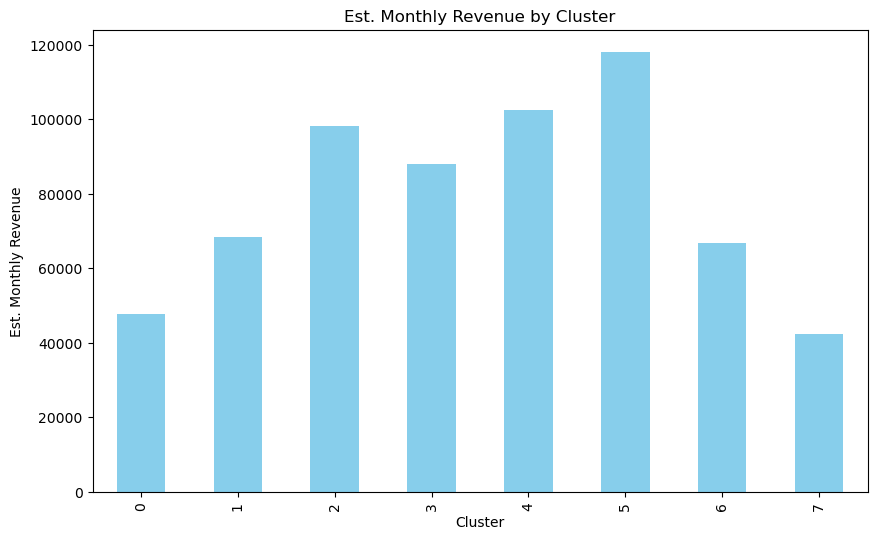

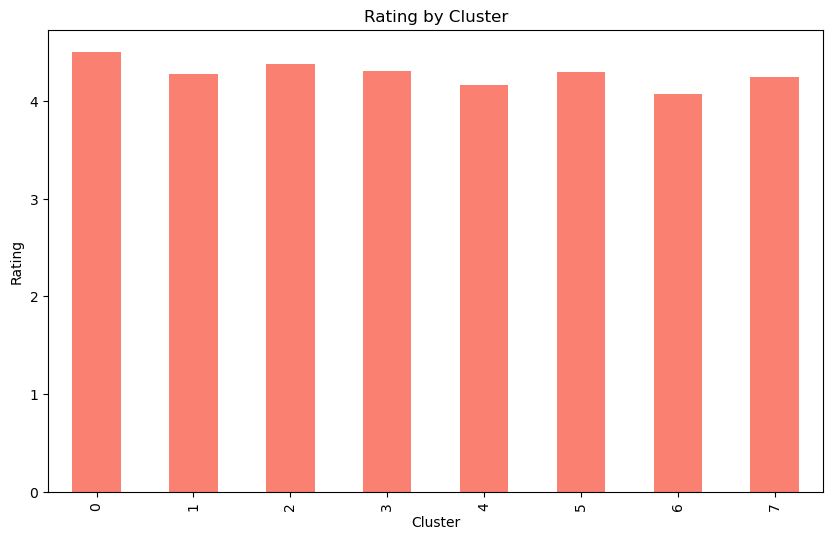

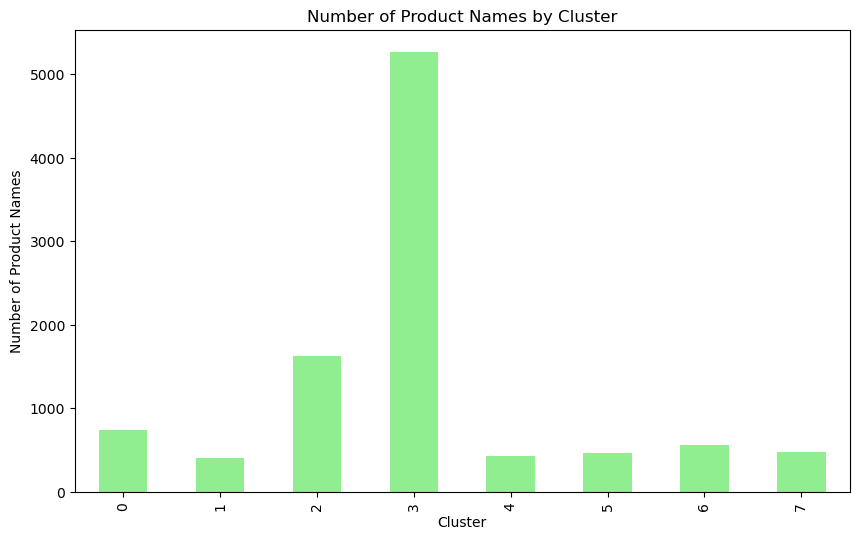

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Gráfico de barras para Est. Monthly Revenue por Cluster
cluster_summary['Est. Monthly Revenue'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Est. Monthly Revenue by Cluster')
plt.ylabel('Est. Monthly Revenue')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para Rating por Cluster
cluster_summary['Rating'].plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Rating by Cluster')
plt.ylabel('Rating')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para la cantidad de Product Names por Cluster
cluster_summary['Product Name'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Product Names by Cluster')
plt.ylabel('Number of Product Names')
plt.xlabel('Cluster')
plt.show()


### Nichos de Mercado

1. **Productos para Bebés y Niños**:
   Este nicho se enfoca en productos para bebés y niños, como juguetes, regalos de cumpleaños, ropa infantil, juegos educativos y suministros para el aula. Podría dirigirse a padres, maestros y cuidadores que buscan artículos para el cuidado y entretenimiento de los niños.

2. **Disfraces y Accesorios para Eventos Especiales**:
   Este nicho está relacionado con disfraces y accesorios para eventos especiales, como Halloween y fiestas temáticas. Podría atraer a personas que buscan trajes y accesorios para fiestas de disfraces y eventos festivos.

3. **Bolsas y Organizadores de Almacenamiento**:
   Este nicho se centra en bolsas y organizadores de almacenamiento de diversos tipos, incluyendo bolsas de viaje, bolsas de comida y organizadores de armarios. Podría dirigirse a personas que necesitan soluciones de almacenamiento y organización en su vida cotidiana.

4. **Productos de Cuidado Personal y del Hogar**:
   Este nicho incluye una variedad de productos de cuidado personal y del hogar, como productos de cuidado capilar, kits de uñas, productos para el hogar y decoración. Podría interesar a personas que buscan productos para el cuidado personal y la decoración del hogar.

5. **Calzado y Zapatos**:
   Este cluster está relacionado con calzado y zapatos de diferentes estilos y para diferentes ocasiones, tanto para mujeres como para hombres. Podría atraer a personas que buscan calzado de moda y cómodo.

6. **Productos de Cama y Descanso**:
   Este nicho se enfoca en productos relacionados con la  cama, como almohadas, mantas, sábanas y colchones. También incluye productos de cuidado personal, como aceite de ricino. Podría dirigirse a personas que buscan mejorar su comodidad y descanso.

7. **Ropa y Tops de Moda**:
   Este nicho se relaciona con ropa de moda, incluyendo camisetas, blusas y sudaderas, tanto para mujeres como para niños. Podría atraer a aquellos interesados en la moda y las tendencias actuales.

8. **Decoración y Suministros para Fiestas**:
   Este nicho se enfoca en decoración y suministros para fiestas, especialmente relacionados con Halloween y otras festividades. Podría interesar a personas que buscan decorar sus hogares y organizar eventos festivos.


## Ejemplo de cluster 9 

In [30]:
pd.set_option('display.max_colwidth', None)
Busqueda_1.loc[Busqueda_1['Cluster'] == 7].head(50)


,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
20,hanging bats halloween decoration outside plastic large flying bats with glowing eyes hanging pasting two ways halloween outdoor tree yard porch decoration supplies18 pcs,patio lawn garden,jsllguin,3,7,1,2023-07-06,127,4.00,9.99,1504.0,15024.96,"[bats, hanging, decoration, glowing, flying, halloween, eyes, porch, outside, tree]",7
31,halloween flag 28 x 40 double sided large halloween garden flag pumpkin gnome welcome house flag for outdoor yard outside farmhouse pumpkin garden halloween decor welcome sign,patio lawn garden,hexagram,28,7,1,2023-08-28,74,4.65,13.99,1076.0,15053.24,"[flag, welcome, garden, pumpkin, halloween, gnome, sided, 28, outside, sign]",7
42,horaldaily halloween tablecloth 60x60 inch round bats washable table cover for party picnic dinner decor,kitchen dining,horaldaily,25,6,1,2023-05-21,173,3.80,14.99,1006.0,15079.94,"[60x60, horaldaily, picnic, bats, dinner, tablecloth, round, washable, table, cover]",7
49,halloween wreath 28 x 12 witch wreaths for front door with witch hat legs pumpkin harvest silk halloween hanging decor wreath sign halloween decorations for door porch window indoor and outdoor,home kitchen,gcsyo,12,7,1,2023-07-10,123,3.20,14.99,1007.0,15094.93,"[wreath, witch, door, halloween, wreaths, legs, harvest, silk, 28, porch]",7
52,chiree halloween necklace or necktie eyeglasses head hoop glow in the dark halloween dress up set light up halloween party favors kids adults halloween party supplies pumpkin bats spiders eyeballs,toys games,chiree,27,8,1,2023-06-17,146,3.80,11.99,1259.0,15095.41,"[halloween, eyeballs, eyeglasses, hoop, party, bats, spiders, glow, head, necklace]",7
62,artoid mode black white spooky haunted house tree ghost witch halloween table runner kitchen dining table decoration for home party decor 13x48 inch,kitchen dining,artoid mode,17,7,1,2023-09-10,61,4.40,14.99,1260.0,15107.40,"[table, artoid, runner, mode, dining, haunted, witch, spooky, ghost, tree]",7
75,8 sheet halloween iron on patches stickers large scary movie characters vinyl heat transfer applique halloween horror clown ghost face iron on decals for tshirts bags clothing diy decorations,arts crafts sewing,fukidog,29,7,1,2023-07-06,127,4.30,13.99,1164.0,15120.36,"[iron, characters, applique, decals, transfer, clown, patches, horror, movie, vinyl]",7
88,52 pcs halloween fidget toys pack halloween mochi squishy toys sticky hands stress relief sensory toys for kids halloween trick or treat party favors goodie bag fillers treasure box prizes,toys games,banerle,17,7,1,2023-09-09,62,4.50,13.99,1083.0,15151.17,"[toys, halloween, mochi, 52, squishy, treasure, sticky, fillers, trick, stress]",7
105,halloween decorations indoorhalloween party decorations halloween theme party supplies halloween party banner halloween balloon 3d bat honeycomb centerpiece halloween party spooky decor,toys games,erosbon,16,7,1,2023-08-26,76,4.20,8.99,1690.0,15193.10,"[halloween, party, decorations, centerpiece, balloon, theme, bat, banner, spooky, 3d]",7
136,wymulot 800 sqft giant spider web halloween decorations outdoor with 10 small spiders 10 ground nails stretchy beef cloth netting cutyourown flexible elastic for yard party decor dongdongwang2,patio lawn garden,wymulot,12,7,1,2023-07-10,123,3.90,16.49,2086.0,34473.14,"[10, cutyourown, netting, 800, sqft, beef, ground, flexible, spiders, web]",7


# PART 2 - Busquedas filtradas

## Busqueda 2 - Maquillaje

In [66]:
# Leer el archivo CSV
Busqueda_2 = pd.read_csv('Data/Busqueda_2.csv', encoding='ISO-8859-1')  # Usamos la codificación ISO-8859-1 que es común para archivos CSV con errores de codificación

Busqueda_2

,ASIN,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Fees,Net,Rank,Reviews,LQS,Sellers,Date First Available,Buy Box Owner,Rating,Dimensions,Product Tier,Weight
0,B0BHSRXS2T,(5+5) Powder Puff Makeup Sponge Blender Beauty Face Triangle Makeup Cosmetic Puff Latext-free Makeup Wedge Foundation Sponge Blender to Make Up Tools Applicator Sponges (black),YEOTWIN,Beauty & Personal Care,"$9,073.02","1,298",$6.99,$4.10,$2.89,"10,521",987,6,1,04/25/2023,Amazon,4.5,"5.43"" x 4.65"" x 2.20""",Large standard-size,2.15 lbs
1,B08CMVXB19,(6Pack) MAX Makeup Cherimoya Lip Polish Coconut Oil Clear Gloss (2Original+2Coconut+2Honey),Cherimoya,Beauty & Personal Care,"$11,757.78","1,574",$7.90,$3.52,$4.38,"10,332",2299.2,6,9,10/29/2019,Amazon,4.4,"4.65"" x 4.37"" x 0.67""",Small standard-size,5.29 lbs
2,B0BGLT253H,1 Box of Flat Back Pearls Kits Half Round White&Beige Pearls with Quick Dry Makeup Glue+Picker Pencil+Tweezer for Nail Art and Face Eye Body Make-up,BELLEBOOST,Beauty & Personal Care,"$192,948.83","25,317",$7.99,$3.40,$4.59,N.A.,592.7272727,7,1,09/14/2023,Amazon,4.572727273,"6.97"" x 3.70"" x 0.55""",Small standard-size,2.4 lbs
3,B09FJHHC3G,1 pcs Liquid Eyeliner Set Glitter Liquid Eyeliner Waterproof Shimmer Silver Gold Metallic Colorful Eyeliners Eyeshadow Makeup 1#,Emirde,Beauty & Personal Care,"$5,089.80","1,020",$4.99,$3.32,$1.67,"14,050",876,7,1,08/22/2020,Emirde,4.1,"0.55"" x 0.67"" x 3.27""",Small standard-size,0.0397 lbs
4,B0BNCH3XCY,1.5-6mm Round Flatback Face Gems Kit (AB) for Makeup with Quick Dry Glue + Brush + Tweezer Nail Art Rhinestones Iridescent Glass Crystal Beads for Make-up Deco,BELLEBOOST,Beauty & Personal Care,"$16,059.90","2,010",$7.99,N.A.,N.A.,"14,449",401.8181818,7,1,10/20/2022,Amazon,4.609090909,N.A.,N.A.,N.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,B098QSRTZL,Zombie Makeup Halloween Makeup Tattoos - 11 Sheets Fake Blood Fake Scar Tattoos Halloween Makeup Kit Zombie Makeup Kit for Kids and Adults Scary Wound Stitches Vampire Makeup Fake Cuts Zombie Tattoos,PARIGO,Beauty & Personal Care,"$10,029.96","1,004",$9.99,$3.72,$6.27,"150,121",237,7,1,09/25/2020,Parigo Profession Store,4.2,"0.16"" x 5.20"" x 12.52""",Small standard-size,0.3086 lbs
2499,B0CCF5Y68D,ZOREYA Makeup Brush Set - 15 Pcs Premium Synthetic Foundation Concealers Eye Shadows Make Up Brush Eyeliner Brushes(Pink),Raffaello,Beauty & Personal Care,"$50,695.82","2,818",$17.99,$6.47,$11.52,"7,750",7731.833333,7,1,01/31/2023,Amazon,4.6,"7.17"" x 4.88"" x 1.73""",Large standard-size,8.47 lbs
2500,B09QZXFWXD,ZQQZAN Clear Makeup Organizer Set 360 Rotating Makeup Organizer with Makeup Palette Organizer 6-Layer Adjustable Cosmetic Organizer Perfume and Lotion Holder Makeup Storage Organizer Countertop,ZQQZAN,Beauty & Personal Care,"$19,518.50","1,030",$17.95,$8.63,$9.32,"24,059",683,7,1,12/11/2021,Amazon,4.6,"3.58"" x 9.25"" x 11.97""",Large standard-size,2.1892 lbs
2501,B0BVBR18NM,Zrfmib Travel Makeup Bag with Light Up Mirror Makeup Train Case with Adjustable Dividers and Shoulder Strap Portable Extra Large Makeup Travel Bag Waterproof Leather Material with Detachable Mirror,Zrfmib,Beauty & Personal Care,"$19,939.50","1,050",$18.99,N.A.,N.A.,"16,992",33,7,1,04/12/2023,Amazon,4.1,N.A.,N.A.,N.A.


In [67]:
Busqueda_2 = Busqueda_2.drop_duplicates(subset='ASIN')

In [68]:
Busqueda_2 = Busqueda_2.drop(columns=['ASIN', 'Rank', 'Fees', 'Net', 'Dimensions', 'Product Tier', 'Weight', 'Buy Box Owner' ])

In [69]:
# Función para limpiar texto
def clean_text(text):
    fixed_text = ftfy.fix_text(text)
    cleaned_text = clean(fixed_text, 
                         fix_unicode=True,
                         to_ascii=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=False,
                         no_digits=False,
                         no_currency_symbols=True,
                         no_punct=True,
                         replace_with_punct="",
                         lang="en")
    return cleaned_text

text_columns = ['Product Name', 'Brand', 'Category']

# Verificar valores faltantes
for col in text_columns:
    Busqueda_2[col] = Busqueda_2[col].astype(str).apply(clean_text)

    
Busqueda_2.replace("N.A.", np.nan, inplace=True)
Busqueda_2.replace("na", np.nan, inplace=True)


In [70]:
# Verificar valores faltantes
missing_values_2 = Busqueda_2.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name            0
Brand                   0
Category                0
Est. Monthly Revenue    0
Est. Monthly Sales      0
Price                   0
Reviews                 9
LQS                     0
Sellers                 0
Date First Available    0
Rating                  9
dtype: int64


### Drop NA

In [71]:
Busqueda_2 = Busqueda_2.dropna(subset=['Reviews'])
Busqueda_2 = Busqueda_2.dropna(subset=['Rating'])

In [72]:
# Verificar valores faltantes
missing_values_2 = Busqueda_2.isnull().sum()
print("Missing values per column:\n", missing_values_2)

Missing values per column:
 Product Name            0
Brand                   0
Category                0
Est. Monthly Revenue    0
Est. Monthly Sales      0
Price                   0
Reviews                 0
LQS                     0
Sellers                 0
Date First Available    0
Rating                  0
dtype: int64


In [62]:
print(Busqueda_2.dtypes)

Product Name                     object
Category                         object
Brand                            object
Reviews                           int64
LQS                               int64
Sellers                           int64
Date First Available     datetime64[ns]
Time in Market (days)             int64
Rating                          float64
Price                           float64
Est. Monthly Sales              float64
Est. Monthly Revenue            float64
Keywords                         object
Cluster                           int32
dtype: object


In [37]:
Busqueda_2['Rating'] = pd.to_numeric(Busqueda_2['Rating'], errors='coerce')
Busqueda_2['Rating'] = Busqueda_2['Rating'].round(2)

# Si 'Reviews' contiene decimales, primero convierte a float y luego a int
Busqueda_2['Reviews'] = pd.to_numeric(Busqueda_2['Reviews'], errors='coerce').fillna(0).astype('int64')

Busqueda_2['Est. Monthly Revenue'] = Busqueda_2['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
Busqueda_2['Est. Monthly Sales'] = Busqueda_2['Est. Monthly Sales'].str.replace(',', '')
Busqueda_2['Price'] = Busqueda_2['Price'].str.replace('$', '').str.replace(',', '')

Busqueda_2['Est. Monthly Sales'] = pd.to_numeric(Busqueda_2['Est. Monthly Sales'], errors='coerce')
Busqueda_2['Price'] = pd.to_numeric(Busqueda_2['Price'], errors='coerce')
Busqueda_2['Est. Monthly Revenue'] = pd.to_numeric(Busqueda_2['Est. Monthly Revenue'], errors='coerce')


C:\Users\Chris\AppData\Local\Temp\ipykernel_10900\2651697664.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_2['Est. Monthly Revenue'] = Busqueda_2['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
C:\Users\Chris\AppData\Local\Temp\ipykernel_10900\2651697664.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_2['Price'] = Busqueda_2['Price'].str.replace('$', '').str.replace(',', '')


## Caluclar tiempo en el mercado por producto

In [38]:
# Convertir la columna "Date First Available" a formato de fecha
Busqueda_2['Date First Available'] = pd.to_datetime(Busqueda_2['Date First Available'])
# Calcular cuánto tiempo ha estado en el mercado cada producto
today = datetime.today()
Busqueda_2['Time in Market (days)'] = (today - Busqueda_2['Date First Available']).dt.days

In [39]:
ordered_columns = [
    'Product Name', 
    'Category', 
    'Brand', 
    'Reviews', 
    'LQS', 
    'Sellers', 
    'Date First Available', 
    'Time in Market (days)', 
    'Rating',
    'Price', 
    'Est. Monthly Sales',
    'Est. Monthly Revenue', 
]
Busqueda_2 = Busqueda_2[ordered_columns]


In [40]:
Busqueda_2

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue
0,5+5 powder puff makeup sponge blender beauty face triangle makeup cosmetic puff latextfree makeup wedge foundation sponge blender to make up tools applicator sponges black,beauty personal care,yeotwin,987,6,1,2023-04-25,199,4.50,6.99,1298.0,9073.02
1,6pack max makeup cherimoya lip polish coconut oil clear gloss 2original+2coconut+2honey,beauty personal care,cherimoya,2299,6,9,2019-10-29,1473,4.40,7.90,1574.0,11757.78
2,1 box of flat back pearls kits half round whitebeige pearls with quick dry makeup glue+picker pencil+tweezer for nail art and face eye body makeup,beauty personal care,belleboost,592,7,1,2023-09-14,57,4.57,7.99,25317.0,192948.83
3,1 pcs liquid eyeliner set glitter liquid eyeliner waterproof shimmer silver gold metallic colorful eyeliners eyeshadow makeup 1,beauty personal care,emirde,876,7,1,2020-08-22,1175,4.10,4.99,1020.0,5089.80
4,156mm round flatback face gems kit ab for makeup with quick dry glue + brush + tweezer nail art rhinestones iridescent glass crystal beads for makeup deco,beauty personal care,belleboost,401,7,1,2022-10-20,386,4.61,7.99,2010.0,16059.90
...,...,...,...,...,...,...,...,...,...,...,...,...
2498,zombie makeup halloween makeup tattoos 11 sheets fake blood fake scar tattoos halloween makeup kit zombie makeup kit for kids and adults scary wound stitches vampire makeup fake cuts zombie tattoos,beauty personal care,parigo,237,7,1,2020-09-25,1141,4.20,9.99,1004.0,10029.96
2499,zoreya makeup brush set 15 pcs premium synthetic foundation concealers eye shadows make up brush eyeliner brushespink,beauty personal care,raffaello,7731,7,1,2023-01-31,283,4.60,17.99,2818.0,50695.82
2500,zqqzan clear makeup organizer set 360 rotating makeup organizer with makeup palette organizer 6layer adjustable cosmetic organizer perfume and lotion holder makeup storage organizer countertop,beauty personal care,zqqzan,683,7,1,2021-12-11,699,4.60,17.95,1030.0,19518.50
2501,zrfmib travel makeup bag with light up mirror makeup train case with adjustable dividers and shoulder strap portable extra large makeup travel bag waterproof leather material with detachable mirror,beauty personal care,zrfmib,33,7,1,2023-04-12,212,4.10,18.99,1050.0,19939.50


## Extracción de Palabras Clave

### Agrupación 

In [41]:
def extract_top_keywords(tfidf_data, feature_names, top_n=10):
    """Extrae las top_n palabras clave para cada fila en tfidf_data."""
    keywords_list = []
    for row in tfidf_data:
        top_indices = row.toarray().argsort()[0, -top_n:][::-1]
        keywords = [feature_names[i] for i in top_indices]
        keywords_list.append(keywords)
    return keywords_list

In [45]:
# Preprocesamiento y Extracción de Palabras Clave
# Calcula la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(Busqueda_2['Product Name'])


# Obtener los nombres de las características (palabras) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Extraer las palabras clave más relevantes para cada fila en tfidf_matrix
Busqueda_2['Keywords'] = extract_top_keywords(tfidf_matrix, feature_names)

# Luego, aplica KMeans
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
Busqueda_2['Cluster'] = km.fit_predict(tfidf_matrix)

C:\Users\Chris\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
Busqueda_2

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
0,5+5 powder puff makeup sponge blender beauty face triangle makeup cosmetic puff latextfree makeup wedge foundation sponge blender to make up tools applicator sponges black,beauty personal care,yeotwin,987,6,1,2023-04-25,199,4.50,6.99,1298.0,9073.02,"[blender, puff, latextfree, sponge, wedge, triangle, applicator, tools, sponges, make]",2
1,6pack max makeup cherimoya lip polish coconut oil clear gloss 2original+2coconut+2honey,beauty personal care,cherimoya,2299,6,9,2019-10-29,1473,4.40,7.90,1574.0,11757.78,"[2honey, 2coconut, 2original, max, cherimoya, 6pack, coconut, polish, gloss, oil]",5
2,1 box of flat back pearls kits half round whitebeige pearls with quick dry makeup glue+picker pencil+tweezer for nail art and face eye body makeup,beauty personal care,belleboost,592,7,1,2023-09-14,57,4.57,7.99,25317.0,192948.83,"[pearls, whitebeige, picker, half, tweezer, quick, glue, kits, flat, box]",3
3,1 pcs liquid eyeliner set glitter liquid eyeliner waterproof shimmer silver gold metallic colorful eyeliners eyeshadow makeup 1,beauty personal care,emirde,876,7,1,2020-08-22,1175,4.10,4.99,1020.0,5089.80,"[eyeliner, eyeliners, liquid, silver, colorful, metallic, gold, shimmer, glitter, eyeshadow]",0
4,156mm round flatback face gems kit ab for makeup with quick dry glue + brush + tweezer nail art rhinestones iridescent glass crystal beads for makeup deco,beauty personal care,belleboost,401,7,1,2022-10-20,386,4.61,7.99,2010.0,16059.90,"[156mm, deco, tweezer, beads, iridescent, ab, glass, flatback, quick, rhinestones]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,zombie makeup halloween makeup tattoos 11 sheets fake blood fake scar tattoos halloween makeup kit zombie makeup kit for kids and adults scary wound stitches vampire makeup fake cuts zombie tattoos,beauty personal care,parigo,237,7,1,2020-09-25,1141,4.20,9.99,1004.0,10029.96,"[tattoos, zombie, fake, cuts, kit, halloween, stitches, scary, 11, wound]",3
2499,zoreya makeup brush set 15 pcs premium synthetic foundation concealers eye shadows make up brush eyeliner brushespink,beauty personal care,raffaello,7731,7,1,2023-01-31,283,4.60,17.99,2818.0,50695.82,"[brushespink, zoreya, brush, concealers, shadows, 15, synthetic, premium, eyeliner, make]",2
2500,zqqzan clear makeup organizer set 360 rotating makeup organizer with makeup palette organizer 6layer adjustable cosmetic organizer perfume and lotion holder makeup storage organizer countertop,beauty personal care,zqqzan,683,7,1,2021-12-11,699,4.60,17.95,1030.0,19518.50,"[organizer, zqqzan, 6layer, perfume, lotion, countertop, rotating, 360, adjustable, holder]",5
2501,zrfmib travel makeup bag with light up mirror makeup train case with adjustable dividers and shoulder strap portable extra large makeup travel bag waterproof leather material with detachable mirror,beauty personal care,zrfmib,33,7,1,2023-04-12,212,4.10,18.99,1050.0,19939.50,"[zrfmib, mirror, shoulder, dividers, strap, bag, detachable, train, extra, travel]",4


In [47]:
# Identificación de Nichos Rentables
cluster_summary_2 = Busqueda_2.groupby('Cluster').agg({
    'Est. Monthly Revenue': 'mean',
    'Rating': 'mean',
    'Product Name': 'count',
})

print(cluster_summary_2)


         Est. Monthly Revenue    Rating  Product Name
Cluster                                              
0                52620.892159  4.175089           452
1                90467.732621  4.433288           146
2                48957.548808  4.550355           311
3                31493.226491  4.355511           324
4                41585.323440  4.570976           291
5                81743.819834  4.433957           979


In [50]:
# Para etiquetar los clusters, puedes identificar las palabras clave más representativas
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :20]:  # Top n palabras
        print(f" {terms[ind]}")
    print("\n")

Top terms per cluster:
Cluster 0:
 lip
 eye
 eyeliner
 pencil
 eyebrow
 eyeshadow
 waterproof
 matte
 makeup
 stick
 lipstick
 lasting
 long
 palette
 liquid
 nyx
 shimmer
 professional
 brown
 gloss


Cluster 1:
 mirror
 vanity
 lighted
 lights
 led
 magnification
 magnifying
 touch
 10x
 dimmable
 makeup
 light
 portable
 travel
 rechargeable
 adjustable
 compact
 lighting
 screen
 sided


Cluster 2:
 powder
 brush
 foundation
 sponge
 makeup
 brushes
 puff
 blending
 set
 blender
 beauty
 liquid
 face
 sponges
 cream
 blush
 synthetic
 concealer
 triangle
 soft


Cluster 3:
 face
 halloween
 body
 paint
 glitter
 blood
 headband
 hair
 fake
 makeup
 cosplay
 gems
 sfx
 tattoos
 spa
 temporary
 rhinestones
 headbands
 party
 costume


Cluster 4:
 bag
 travel
 cosmetic
 toiletry
 women
 organizer
 pouch
 bags
 large
 makeup
 clear
 zipper
 portable
 toiletries
 case
 accessories
 purse
 waterproof
 girls
 cute


Cluster 5:
 makeup
 skin
 oz
 remover
 face
 mascara
 lashes
 pack
 fl
 e

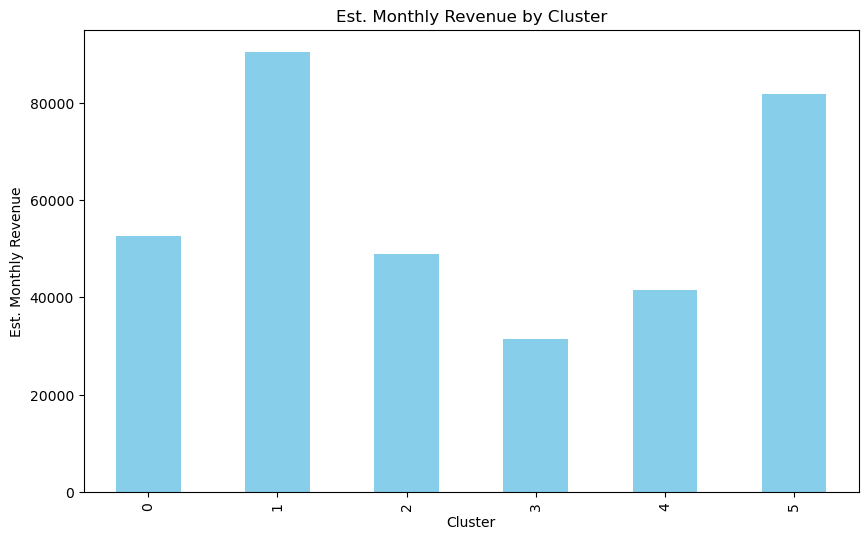

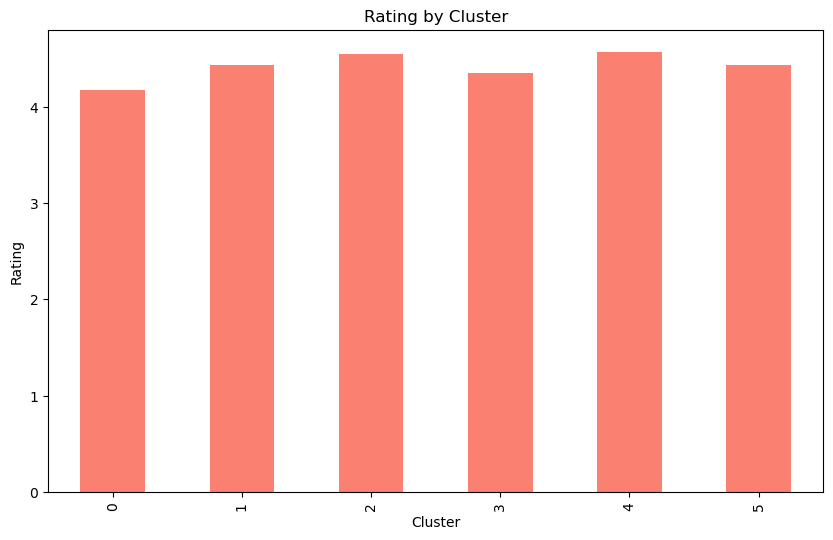

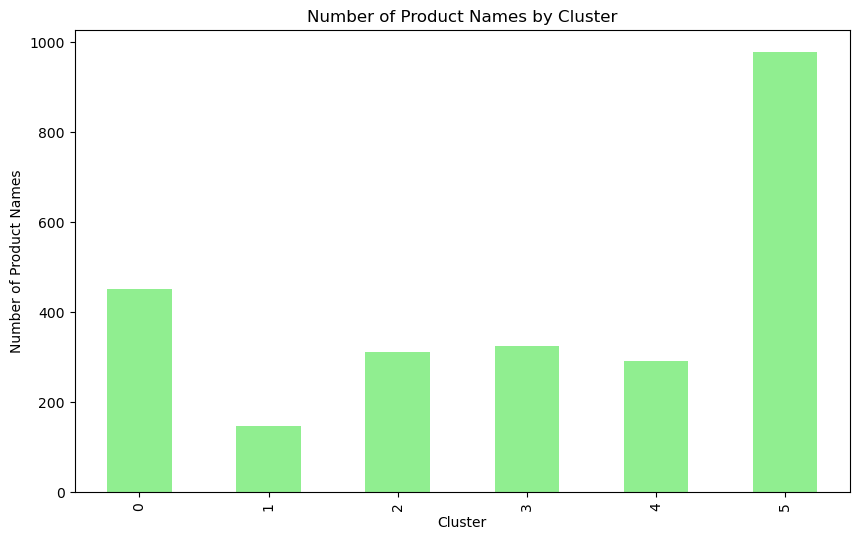

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Gráfico de barras para Est. Monthly Revenue por Cluster
cluster_summary_2['Est. Monthly Revenue'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Est. Monthly Revenue by Cluster')
plt.ylabel('Est. Monthly Revenue')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para Rating por Cluster
cluster_summary_2['Rating'].plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Rating by Cluster')
plt.ylabel('Rating')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para la cantidad de Product Names por Cluster
cluster_summary_2['Product Name'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Product Names by Cluster')
plt.ylabel('Number of Product Names')
plt.xlabel('Cluster')
plt.show()

### Nichos de Mercado

1. **Maquillaje y Belleza de Ojos**
   Este cluster se enfoca en productos de maquillaje y belleza para los ojos, incluyendo lápices labiales, delineadores de ojos, sombras de ojos y máscaras de pestañas. Podría dirigirse a personas interesadas en resaltar y realzar la belleza de sus ojos con una amplia gama de colores y estilos.

2. **Espejos de Maquillaje Iluminados**
   Este cluster se relaciona con espejos de maquillaje que incorporan iluminación y funciones ajustables. Podría atraer a personas que buscan espejos de maquillaje de alta calidad para asegurarse de que su maquillaje se aplique correctamente.

3. **Herramientas y Cepillos de Maquillaje**
   Este cluster está centrado en herramientas y cepillos de maquillaje, incluyendo brochas, esponjas y sets de maquillaje. Podría dirigirse a entusiastas del maquillaje que buscan herramientas de calidad para lograr una aplicación de maquillaje profesional.

4. **Maquillaje Artístico y de Fantasía**
   Este cluster se relaciona con productos de maquillaje utilizados para crear looks artísticos y de fantasía, como maquillaje para Halloween, cosplay y efectos especiales. Podría atraer a aquellos que buscan productos para caracterización y disfraces.

5. **Bolsos y Organizadores de Maquillaje de Viaje**
   Este cluster se centra en bolsos y organizadores de maquillaje diseñados para viajes y almacenamiento. Podría dirigirse a personas que necesitan soluciones de almacenamiento y transporte para sus productos de belleza mientras están en movimiento.

6. **Cuidado de la Piel y Productos de Limpieza**
   Este cluster incluye productos para el cuidado de la piel, como removedores de maquillaje y limpiadores faciales. Podría atraer a personas preocupadas por el cuidado de su piel y la eliminación efectiva del maquillaje.


## Busqueda 3 - Mascotas

In [52]:
# Leer el archivo CSV
Busqueda_3 = pd.read_csv('Data/Busqueda_3.csv', encoding='ISO-8859-1')  # Usamos la codificación ISO-8859-1 que es común para archivos CSV con errores de codificación

Busqueda_3

,ASIN,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Fees,Net,Rank,Reviews,LQS,Sellers,Date First Available,Buy Box Owner,Rating,Dimensions,Product Tier,Weight
0,B079PT7PCP,"""Nature's Pure Edge Yard Odor Eliminator. Perfect For Artificial Grass Patio Kennel and Lawn. Instantly Removes Stool and Urine Odor. Long Lasting. Kid and Pet Safe.",Nature's Pure Edge,Pet Supplies,"$43,973.94","2,202",$19.97,$8.14,$11.83,"3,674",2488,6,1,02/07/2018,Amazon,4.1,"3.68"" x 3.68"" x 7.00""",Large standard-size,1.88 lbs
1,B09YTZLRY4,"(100 Pads) CalPalmy Ultra Absorbency Pet Toilet Training Pads 18"" x 13"" Moisture Locking Technology Turns Liquid into Gel - Perfect for Rabbits and Guinea Pigs",CALPALMY,Pet Supplies,"$34,222.88","1,712",$20.99,$6.77,$14.22,"5,079",1419,7,3,04/19/2020,Amazon,4.2,"8.00"" x 5.00"" x 3.00""",Large standard-size,0.4 lbs
2,B0CL38LKY6,(2 Pack) Hemp Oil for Dogs and Cats - Helps Pets with Anxiety Pain Stress Sleep Arthritis Seizures Relief - Cat Anxiety Relief - Omega 3-6-9 - Pet Hemp Oil Drops Treats - Hip and Joint Support,Pawstopia,Pet Supplies,"$33,526.65","1,689",$19.85,$6.52,$13.33,N.A.,2318,6,1,11/28/2021,Amazon,4.2,"4.69"" x 3.39"" x 1.38""",Large standard-size,5.61 lbs
3,B0C7CDVX7C,(2 Packs) Pet Hemp Oil for Dogs and Cats Anxiety Stress Pain Holistic Inflammation Skin Allergies Relief Joint Hip Ðrthritis Sleep Aid Calming Oil Drop Organic Extract Treats,MaxHemp,Pet Supplies,"$89,719.20","4,080",$19.99,$6.54,$13.45,N.A.,1447.333333,6,2,05/05/2021,Amazon,4.2,"3.86"" x 2.80"" x 1.54""",Large standard-size,5.93 lbs
4,B0BTNTF37Y,---Pet 'n Shape Chik 'n Wrapped Biscuits â Natural Chicken Wrapped Dog Treats - 35 Ounce,Pet 'n Shape,Pet Supplies,"$35,597.70","2,138",$14.32,$8.93,$5.39,"3,620",2358,6,7,07/31/2016,Amazon,4.6,"7.00"" x 7.00"" x 8.75""",Large standard-size,2 lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,B0014HYCM0,Zymox Ear Cleanser With Bio-Active Enzymes 4 oz.,Pet King Brands,Pet Supplies,"$16,575.24","1,276",$12.99,$5.49,$7.50,"11,413",5604,5,6,10/14/2009,Amazon,4.6,"1.50"" x 1.50"" x 6.00""",Large standard-size,4.8 lbs
3300,B07CL28Z3F,ZYMOX Ear Solution,Pet King Brands,Pet Supplies,"$158,218.35","3,165",$49.99,N.A.,N.A.,"2,637",5383,3,1,12/05/2017,Happy Dog Place,4.7,N.A.,N.A.,N.A.
3301,B079RCH14D,Â· Petgrow Â· Cute Banana Cat Bed House Extra Large Size Christmas Soft Cat Cuddle Bed Lovely Pet Supplies for Cats Kittens Rabbit Small Dogs Yellow,Petgrow,Pet Supplies,"$61,389.72","1,428",$32.99,$10.97,$22.02,"10,045",3057,6,1,02/11/2018,Amazon Warehouse,4.3,"15.70"" x 6.70"" x 4.30""",Large standard-size,14.89 lbs
3302,B09J2JLZSN,ãUpgraded Versionã EGETOTA Cat Doors Flap Magnetic Pet Door with 4 Way Locking for Interior Exterior Doors Weatherproof Pet Door for Cats Doggie Kitties & Kittens Easy Installation (Black M),EGETOTA,Pet Supplies,"$17,429.10","1,090",$15.99,$6.17,$9.82,"5,888",326,7,1,11/01/2021,okwf,4.3,"2.36"" x 7.64"" x 8.78""",Large standard-size,0.7055 lbs


In [53]:
Busqueda_3 = Busqueda_3.drop_duplicates(subset='ASIN')

In [54]:
Busqueda_3 = Busqueda_3.drop(columns=['ASIN', 'Rank', 'Fees', 'Net', 'Dimensions', 'Product Tier', 'Weight', 'Buy Box Owner' ])

In [57]:
# Función para limpiar texto
def clean_text(text):
    fixed_text = ftfy.fix_text(text)
    cleaned_text = clean(fixed_text, 
                         fix_unicode=True,
                         to_ascii=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=False,
                         no_digits=False,
                         no_currency_symbols=True,
                         no_punct=True,
                         replace_with_punct="",
                         lang="en")
    return cleaned_text

text_columns = ['Product Name', 'Brand', 'Category']

# Verificar valores faltantes
for col in text_columns:
    Busqueda_3[col] = Busqueda_3[col].astype(str).apply(clean_text)

    
Busqueda_3.replace("N.A.", np.nan, inplace=True)
Busqueda_3.replace("na", np.nan, inplace=True)


In [73]:
# Verificar valores faltantes
missing_values_3 = Busqueda_3.isnull().sum()
print("Missing values per column:\n", missing_values_3)

Missing values per column:
 Product Name            0
Brand                   0
Category                0
Est. Monthly Revenue    0
Est. Monthly Sales      0
Price                   0
Reviews                 9
LQS                     0
Sellers                 0
Date First Available    0
Rating                  9
dtype: int64


In [74]:
Busqueda_3 = Busqueda_3.dropna(subset=['Reviews'])
Busqueda_3 = Busqueda_3.dropna(subset=['Rating'])

In [75]:
# Verificar valores faltantes
missing_values_3 = Busqueda_3.isnull().sum()
print("Missing values per column:\n", missing_values_3)

Missing values per column:
 Product Name            0
Brand                   0
Category                0
Est. Monthly Revenue    0
Est. Monthly Sales      0
Price                   0
Reviews                 0
LQS                     0
Sellers                 0
Date First Available    0
Rating                  0
dtype: int64


In [76]:
print(Busqueda_3.dtypes)

Product Name            object
Brand                   object
Category                object
Est. Monthly Revenue    object
Est. Monthly Sales      object
Price                   object
Reviews                 object
LQS                      int64
Sellers                  int64
Date First Available    object
Rating                  object
dtype: object


In [77]:
Busqueda_3['Rating'] = pd.to_numeric(Busqueda_3['Rating'], errors='coerce')
Busqueda_3['Rating'] = Busqueda_3['Rating'].round(2)

# Si 'Reviews' contiene decimales, primero convierte a float y luego a int
Busqueda_3['Reviews'] = pd.to_numeric(Busqueda_3['Reviews'], errors='coerce').fillna(0).astype('int64')

Busqueda_3['Est. Monthly Revenue'] = Busqueda_3['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
Busqueda_3['Est. Monthly Sales'] = Busqueda_3['Est. Monthly Sales'].str.replace(',', '')
Busqueda_3['Price'] = Busqueda_3['Price'].str.replace('$', '').str.replace(',', '')

Busqueda_3['Est. Monthly Sales'] = pd.to_numeric(Busqueda_3['Est. Monthly Sales'], errors='coerce')
Busqueda_3['Price'] = pd.to_numeric(Busqueda_3['Price'], errors='coerce')
Busqueda_3['Est. Monthly Revenue'] = pd.to_numeric(Busqueda_3['Est. Monthly Revenue'], errors='coerce')

C:\Users\Chris\AppData\Local\Temp\ipykernel_10900\1357608840.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_3['Est. Monthly Revenue'] = Busqueda_3['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
C:\Users\Chris\AppData\Local\Temp\ipykernel_10900\1357608840.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_3['Price'] = Busqueda_3['Price'].str.replace('$', '').str.replace(',', '')


In [78]:
# Convertir la columna "Date First Available" a formato de fecha
Busqueda_3['Date First Available'] = pd.to_datetime(Busqueda_3['Date First Available'])
# Calcular cuánto tiempo ha estado en el mercado cada producto
today = datetime.today()
Busqueda_3['Time in Market (days)'] = (today - Busqueda_3['Date First Available']).dt.days

In [80]:
ordered_columns = [
    'Product Name', 
    'Category', 
    'Brand', 
    'Reviews', 
    'LQS', 
    'Sellers', 
    'Date First Available', 
    'Time in Market (days)', 
    'Rating',
    'Price', 
    'Est. Monthly Sales',
    'Est. Monthly Revenue', 
]
Busqueda_3 = Busqueda_3[ordered_columns]

In [81]:
Busqueda_3

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue
0,natures pure edge yard odor eliminator perfect for artificial grass patio kennel and lawn instantly removes stool and urine odor long lasting kid and pet safe,pet supplies,natures pure edge,2488,6,1,2018-02-07,2102,4.1,19.97,2202.0,43973.94
1,100 pads calpalmy ultra absorbency pet toilet training pads 18 x 13 moisture locking technology turns liquid into gel perfect for rabbits and guinea pigs,pet supplies,calpalmy,1419,7,3,2020-04-19,1300,4.2,20.99,1712.0,34222.88
2,2 pack hemp oil for dogs and cats helps pets with anxiety pain stress sleep arthritis seizures relief cat anxiety relief omega 369 pet hemp oil drops treats hip and joint support,pet supplies,pawstopia,2318,6,1,2021-11-28,712,4.2,19.85,1689.0,33526.65
3,2 packs pet hemp oil for dogs and cats anxiety stress pain holistic inflammation skin allergies relief joint hip arthritis sleep aid calming oil drop organic extract treats,pet supplies,maxhemp,1447,6,2,2021-05-05,919,4.2,19.99,4080.0,89719.20
4,pet n shape chik n wrapped biscuits natural chicken wrapped dog treats 35 ounce,pet supplies,pet n shape,2358,6,7,2016-07-31,2658,4.6,14.32,2138.0,35597.70
...,...,...,...,...,...,...,...,...,...,...,...,...
3299,zymox ear cleanser with bioactive enzymes 4 oz,pet supplies,pet king brands,5604,5,6,2009-10-14,5140,4.6,12.99,1276.0,16575.24
3300,zymox ear solution,pet supplies,pet king brands,5383,3,1,2017-12-05,2166,4.7,49.99,3165.0,158218.35
3301,petgrow cute banana cat bed house extra large size christmas soft cat cuddle bed lovely pet supplies for cats kittens rabbit small dogs yellow,pet supplies,petgrow,3057,6,1,2018-02-11,2098,4.3,32.99,1428.0,61389.72
3302,upgraded version egetota cat doors flap magnetic pet door with 4 way locking for interior exterior doors weatherproof pet door for cats doggie kitties kittens easy installation black m,pet supplies,egetota,326,7,1,2021-11-01,739,4.3,15.99,1090.0,17429.10


## Extraccion de palabras clave

### Agrupación

In [85]:
def extract_top_keywords(tfidf_data, feature_names, top_n=10):
    """Extrae las top_n palabras clave para cada fila en tfidf_data."""
    keywords_list = []
    for row in tfidf_data:
        top_indices = row.toarray().argsort()[0, -top_n:][::-1]
        keywords = [feature_names[i] for i in top_indices]
        keywords_list.append(keywords)
    return keywords_list

In [87]:
# Preprocesamiento y Extracción de Palabras Clave
# Calcula la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(Busqueda_3['Product Name'])


# Obtener los nombres de las características (palabras) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Extraer las palabras clave más relevantes para cada fila en tfidf_matrix
Busqueda_3['Keywords'] = extract_top_keywords(tfidf_matrix, feature_names)

# Luego, aplica KMeans
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
Busqueda_3['Cluster'] = km.fit_predict(tfidf_matrix)

In [88]:
Busqueda_3

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
0,natures pure edge yard odor eliminator perfect for artificial grass patio kennel and lawn instantly removes stool and urine odor long lasting kid and pet safe,pet supplies,natures pure edge,2488,6,1,2018-02-07,2102,4.1,19.97,2202.0,43973.94,"[odor, instantly, patio, stool, kid, pure, lawn, natures, edge, artificial]",3
1,100 pads calpalmy ultra absorbency pet toilet training pads 18 x 13 moisture locking technology turns liquid into gel perfect for rabbits and guinea pigs,pet supplies,calpalmy,1419,7,3,2020-04-19,1300,4.2,20.99,1712.0,34222.88,"[pads, turns, absorbency, moisture, toilet, technology, gel, liquid, 13, locking]",3
2,2 pack hemp oil for dogs and cats helps pets with anxiety pain stress sleep arthritis seizures relief cat anxiety relief omega 369 pet hemp oil drops treats hip and joint support,pet supplies,pawstopia,2318,6,1,2021-11-28,712,4.2,19.85,1689.0,33526.65,"[hemp, anxiety, oil, relief, 369, seizures, drops, arthritis, hip, helps]",3
3,2 packs pet hemp oil for dogs and cats anxiety stress pain holistic inflammation skin allergies relief joint hip arthritis sleep aid calming oil drop organic extract treats,pet supplies,maxhemp,1447,6,2,2021-05-05,919,4.2,19.99,4080.0,89719.20,"[oil, drop, arthritis, inflammation, allergies, hemp, hip, aid, organic, pain]",3
4,pet n shape chik n wrapped biscuits natural chicken wrapped dog treats 35 ounce,pet supplies,pet n shape,2358,6,7,2016-07-31,2658,4.6,14.32,2138.0,35597.70,"[wrapped, biscuits, chik, 35, shape, ounce, chicken, treats, natural, dog]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,zymox ear cleanser with bioactive enzymes 4 oz,pet supplies,pet king brands,5604,5,6,2009-10-14,5140,4.6,12.99,1276.0,16575.24,"[cleanser, zymox, enzymes, ear, oz, dha, diabetes, diabetic, diameter, diamond]",3
3300,zymox ear solution,pet supplies,pet king brands,5383,3,1,2017-12-05,2166,4.7,49.99,3165.0,158218.35,"[zymox, ear, solution, diaper, dgeagle, dh015xl, dha, diabetes, diabetic, diameter]",3
3301,petgrow cute banana cat bed house extra large size christmas soft cat cuddle bed lovely pet supplies for cats kittens rabbit small dogs yellow,pet supplies,petgrow,3057,6,1,2018-02-11,2098,4.3,32.99,1428.0,61389.72,"[cuddle, lovely, banana, bed, yellow, kittens, rabbit, house, size, christmas]",0
3302,upgraded version egetota cat doors flap magnetic pet door with 4 way locking for interior exterior doors weatherproof pet door for cats doggie kitties kittens easy installation black m,pet supplies,egetota,326,7,1,2021-11-01,739,4.3,15.99,1090.0,17429.10,"[doors, door, egetota, installation, exterior, magnetic, version, kitties, weatherproof, interior]",3


In [89]:
# Identificación de Nichos Rentables
cluster_summary_3 = Busqueda_3.groupby('Cluster').agg({
    'Est. Monthly Revenue': 'mean',
    'Rating': 'mean',
    'Product Name': 'count',
})

print(cluster_summary_3)

         Est. Monthly Revenue    Rating  Product Name
Cluster                                              
0               141886.735512  4.417725           255
1                32658.495912  4.310890           326
2                82393.724333  4.435000           180
3               102850.245281  4.437314          2260
4                87692.765594  4.482986           144
5                55546.609147  4.393154           130


In [91]:
# Para etiquetar los clusters, puedes identificar las palabras clave más representativas
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :20]:  # Top n palabras
        print(f" {terms[ind]}")
    print("\n")

Top terms per cluster:
Cluster 0:
 bed
 washable
 dog
 beds
 cover
 large
 dogs
 crate
 waterproof
 sofa
 orthopedic
 removable
 blanket
 pet
 couch
 mat
 foam
 cat
 plush
 pad


Cluster 1:
 clothes
 dog
 sweater
 costume
 halloween
 winter
 warm
 puppy
 small
 pet
 apparel
 dogs
 cat
 christmas
 sweaters
 coat
 costumes
 pajamas
 cold
 medium


Cluster 2:
 voyager
 neoprene
 breed
 stepin
 harness
 handle
 leash
 best
 combo
 reflective
 supplies
 medium
 small
 supports
 large
 puppies
 air
 weather
 set
 mesh


Cluster 3:
 dog
 pet
 cat
 dogs
 food
 collar
 cats
 large
 small
 grooming
 puppy
 pads
 pack
 medium
 bags
 toys
 hair
 seat
 natural
 training


Cluster 4:
 fountain
 water
 filters
 cat
 replacement
 filter
 dispenser
 automatic
 pump
 bowl
 steel
 stainless
 pet
 pack
 filtration
 quiet
 cats
 drinking
 dog
 inside


Cluster 5:
 harness
 vest
 adjustable
 reflective
 pull
 dog
 leash
 control
 small
 easy
 soft
 large
 nopull
 breathable
 mesh
 dogs
 medium
 muzzle
 hand

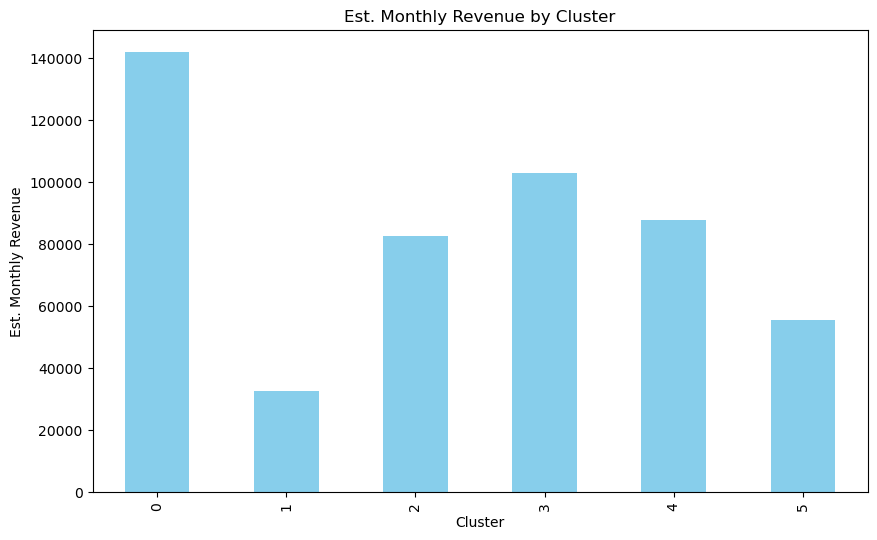

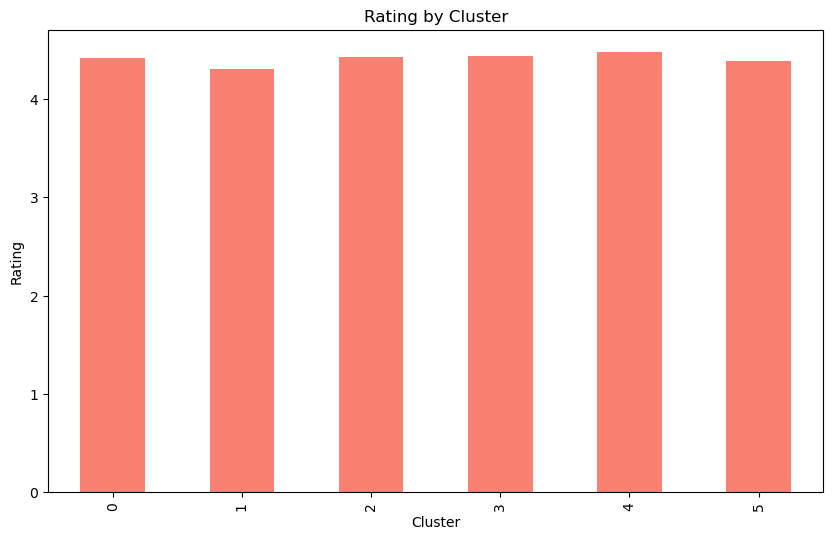

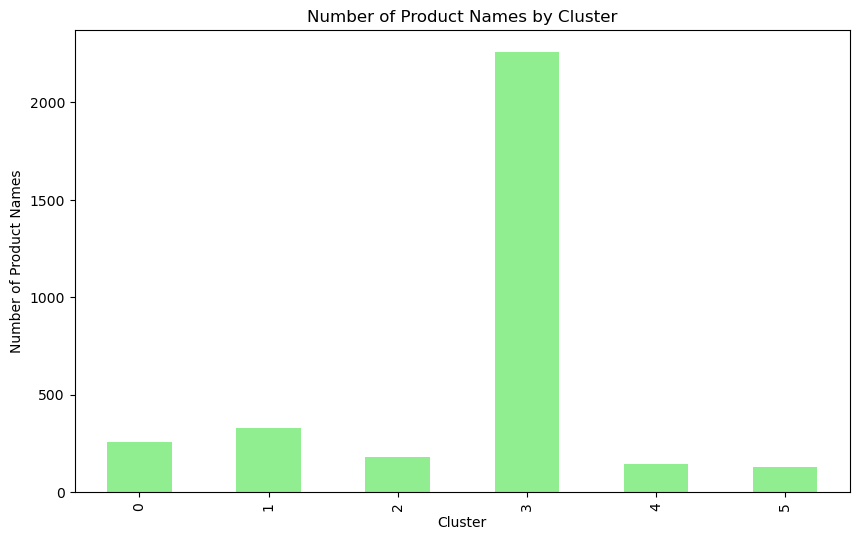

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Gráfico de barras para Est. Monthly Revenue por Cluster
cluster_summary_3['Est. Monthly Revenue'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Est. Monthly Revenue by Cluster')
plt.ylabel('Est. Monthly Revenue')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para Rating por Cluster
cluster_summary_3['Rating'].plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Rating by Cluster')
plt.ylabel('Rating')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para la cantidad de Product Names por Cluster
cluster_summary_3['Product Name'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Product Names by Cluster')
plt.ylabel('Number of Product Names')
plt.xlabel('Cluster')
plt.show()

### Nichos de Mercado

1. **Productos para el Descanso de Mascotas**
   Este cluster se enfoca en productos relacionados con el descanso de mascotas, como camas, mantas, colchones y almohadas para perros y gatos. Podría dirigirse a dueños de mascotas que buscan comodidad y calidad para el descanso de sus animales.

2. **Ropa y Accesorios para Mascotas en Clima Frío**
   Este cluster se relaciona con ropa y accesorios para perros y gatos diseñados para climas fríos, incluyendo suéteres, abrigos y disfraces de invierno. Podría atraer a dueños de mascotas que desean mantener a sus animales abrigados durante el invierno.

3. **Equipamiento para Paseo y Control de Mascotas**
   Este cluster incluye productos para el paseo y control de mascotas, como arneses, correas y collares reflectantes. Podría dirigirse a dueños de mascotas que buscan equipos de alta calidad y seguridad para sacar a pasear a sus animales.

4. **Productos para la Alimentación y Cuidado de Mascotas**
   Este cluster se enfoca en productos para la alimentación y cuidado de mascotas, como comida para perros y gatos, comederos, juguetes y accesorios de aseo. Podría interesar a dueños de mascotas que buscan productos de calidad para el cuidado y bienestar de sus animales.

5. **Fuentes de Agua Automáticas para Mascotas**
   Este cluster se relaciona con fuentes de agua automáticas para perros y gatos, incluyendo filtros y bombas. Podría atraer a dueños de mascotas preocupados por la hidratación y salud de sus animales.

6. **Arnés y Accesorios para Paseos de Mascotas**
   Este cluster se centra en arneses y accesorios para paseos de mascotas, incluyendo chalecos reflectantes, correas ajustables y productos de control. Podría dirigirse a dueños de mascotas que buscan comodidad y seguridad durante los paseos con sus animales.



## Busqueda 4 - Juguetes

In [93]:
# Leer el archivo CSV
Busqueda_4 = pd.read_csv('Data/Busqueda_4.csv', encoding='ISO-8859-1')  # Usamos la codificación ISO-8859-1 que es común para archivos CSV con errores de codificación

Busqueda_4

,ASIN,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Fees,Net,Rank,Reviews,LQS,Sellers,Date First Available,Buy Box Owner,Rating,Dimensions,Product Tier,Weight
0,B0BN77V7RR,(60 Pcs) Fidget Toys Fidgets Sensory Toys Pop Its It Party Favors Figette Toy Pack Bulk Box Stress Autism Autistic for Kids Children Boys Girls Adults Gifts Set Mini Carnival Treasure Classroom Prizes,TOMTY,Toys & Games,"$24,167.60","1,240",$19.49,N.A.,N.A.,"11,003",1291,7,6,11/27/2022,Amazon,4.7,N.A.,N.A.,N.A.
1,B0BY3M4469,(6PCS) Magnetic Rings Fidget Toy Set Idea ADHD Fidget Toys Adult Fidget Magnets Spinner Rings for Anxiety Relief Therapy Fidget Pack Great Gift for Adults Teens Kids,Finger Rock,Toys & Games,"$98,219.19","5,781",$9.99,$6.09,$3.90,"1,329",7672.8,7,1,02/06/2021,Amazon Warehouse,4.2,"0.87"" x 4.92"" x 4.96""",Large standard-size,0.1543 lbs
2,B09924V7RZ,(Butterfly Fairy Female Gift) Rainbow Pop Fidget Sensory Toy Pop Bubble Sensory Fidget Toy Human Turtle Butterfly Fairy Bubble Sensory Fidget Toys,Roaqua,Toys & Games,"$15,622.20","1,980",$7.89,$4.72,$3.17,"6,282",68,7,1,04/26/2021,newwaalf,4.7,"1.34"" x 2.60"" x 4.25""",Large standard-size,0.1279 lbs
3,B0CD2BKR5D,1 Year Old Boy Girl Gifts 2 in 1 Toddler Musical Mat Keyboard & Drum Early Educational Learning Musical Toy Piano Mat for Toddlers 1-3 First Birthday Gifts for 1 2 Year Old Girls Boys Presents,Tsomtto,Toys & Games,"$45,842.06","1,994",$22.99,N.A.,N.A.,N.A.,95,7,1,08/02/2023,Amazon,4.5,N.A.,N.A.,N.A.
4,B0CBBJJQRK,1/20 Construction Bulldozer Toy - Kids Toy Engineering Digger Truck Remote Control Hydraulic Toy Car for 6 7 8 9 Year Old Boys Girls Beginner Car Tractor Vehicle Birthday Gifts for Kids,MQDMINI,Toys & Games,"$59,951.50","2,447",$24.15,N.A.,N.A.,"4,501",83,7,2,02/23/2023,Amazon,4.1,N.A.,N.A.,N.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,B09J4H21NS,ZZHHYY Pop It Purse Shoulder Bag Fidget Toys Rainbow Simple Pop Fidget Bag Toy School Supplies Backpack Silicone Bag Pop for Girls (Butterfly-b),ZZHHYY,Toys & Games,"$82,173.00","6,370",$11.50,N.A.,N.A.,"27,193",1,7,1,10/18/2021,hositor,3,"0.00"" x 0.00"" x 0.00""",N.A.,0 lbs
3052,B0C8N9B8R6,âMattel Jurassic World The Lost World: Jurassic Park Dinosaur Toy Juvenile Tyrannosaurus Rex Hammond Collection Premium Articulated Figure,Mattel,Toys & Games,"$30,934.20","2,580",$11.99,N.A.,N.A.,"2,183",447,6,7,09/30/2023,Amazon Warehouse,4.6,N.A.,N.A.,N.A.
3053,B0BN7RZBST,ã2023 Upgradeã Baby Bath Toys Gifts Rechargeable Whale Baby Toys Light Up Bath Toys for Toddlers Sprinkler Bathtub Toys for Infants Kids 3+ Years Spray Water Bath Toy Pool Bathroom Tub Baby Toy,ANGGIKO,Toys & Games,"$13,007.72","1,628",$8.99,N.A.,N.A.,"11,214",204,7,1,11/23/2022,Amazon,4.4,N.A.,N.A.,N.A.
3054,B08ZH4VRBS,ãRainbow 3-PackãPop up It Push on Pop Buble Fidget Sensory Toy Set Push on Pop Silicone Game Toy Anxiety Stress Reliever Autism Learning Materials for Kids Teens Adults (Coloful),MOZSOY,Toys & Games,"$17,598.26","1,174",$14.99,N.A.,N.A.,"6,934",91,7,1,03/18/2021,US-Fast delivery,4.6,"0.00"" x 0.00"" x 0.00""",N.A.,0 lbs


In [94]:
Busqueda_4 = Busqueda_4.drop_duplicates(subset='ASIN')

In [95]:
Busqueda_4 = Busqueda_4.drop(columns=['ASIN', 'Rank', 'Fees', 'Net', 'Dimensions', 'Product Tier', 'Weight', 'Buy Box Owner' ])

In [96]:
# Función para limpiar texto
def clean_text(text):
    fixed_text = ftfy.fix_text(text)
    cleaned_text = clean(fixed_text, 
                         fix_unicode=True,
                         to_ascii=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=False,
                         no_digits=False,
                         no_currency_symbols=True,
                         no_punct=True,
                         replace_with_punct="",
                         lang="en")
    return cleaned_text

text_columns = ['Product Name', 'Brand', 'Category']

# Verificar valores faltantes
for col in text_columns:
    Busqueda_4[col] = Busqueda_4[col].astype(str).apply(clean_text)

    
Busqueda_4.replace("N.A.", np.nan, inplace=True)
Busqueda_4.replace("na", np.nan, inplace=True)


In [97]:
# Verificar valores faltantes
missing_values_4 = Busqueda_4.isnull().sum()
print("Missing values per column:\n", missing_values_4)

Missing values per column:
 Product Name             0
Brand                    0
Category                 0
Est. Monthly Revenue     0
Est. Monthly Sales       0
Price                    0
Reviews                 15
LQS                      0
Sellers                  0
Date First Available     0
Rating                  15
dtype: int64


### Drop NA

In [101]:
Busqueda_4 = Busqueda_4.dropna(subset=['Reviews'])
Busqueda_4 = Busqueda_4.dropna(subset=['Rating'])

In [102]:
# Verificar valores faltantes
missing_values_4 = Busqueda_4.isnull().sum()
print("Missing values per column:\n", missing_values_4)

Missing values per column:
 Product Name            0
Brand                   0
Category                0
Est. Monthly Revenue    0
Est. Monthly Sales      0
Price                   0
Reviews                 0
LQS                     0
Sellers                 0
Date First Available    0
Rating                  0
dtype: int64


In [103]:
print(Busqueda_4.dtypes)

Product Name            object
Brand                   object
Category                object
Est. Monthly Revenue    object
Est. Monthly Sales      object
Price                   object
Reviews                 object
LQS                      int64
Sellers                  int64
Date First Available    object
Rating                  object
dtype: object


In [104]:
Busqueda_4['Rating'] = pd.to_numeric(Busqueda_4['Rating'], errors='coerce')
Busqueda_4['Rating'] = Busqueda_4['Rating'].round(2)

# Si 'Reviews' contiene decimales, primero convierte a float y luego a int
Busqueda_4['Reviews'] = pd.to_numeric(Busqueda_4['Reviews'], errors='coerce').fillna(0).astype('int64')

Busqueda_4['Est. Monthly Revenue'] = Busqueda_4['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
Busqueda_4['Est. Monthly Sales'] = Busqueda_4['Est. Monthly Sales'].str.replace(',', '')
Busqueda_4['Price'] = Busqueda_4['Price'].str.replace('$', '').str.replace(',', '')

Busqueda_4['Est. Monthly Sales'] = pd.to_numeric(Busqueda_4['Est. Monthly Sales'], errors='coerce')
Busqueda_4['Price'] = pd.to_numeric(Busqueda_4['Price'], errors='coerce')
Busqueda_4['Est. Monthly Revenue'] = pd.to_numeric(Busqueda_4['Est. Monthly Revenue'], errors='coerce')

C:\Users\Chris\AppData\Local\Temp\ipykernel_10900\1103365721.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_4['Est. Monthly Revenue'] = Busqueda_4['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
C:\Users\Chris\AppData\Local\Temp\ipykernel_10900\1103365721.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Busqueda_4['Price'] = Busqueda_4['Price'].str.replace('$', '').str.replace(',', '')


## Caluclar tiempo en el mercado por producto

In [105]:
# Convertir la columna "Date First Available" a formato de fecha
Busqueda_4['Date First Available'] = pd.to_datetime(Busqueda_4['Date First Available'])
# Calcular cuánto tiempo ha estado en el mercado cada producto
today = datetime.today()
Busqueda_4['Time in Market (days)'] = (today - Busqueda_4['Date First Available']).dt.days

In [ ]:
ordered_columns = [
    'Product Name', 
    'Category', 
    'Brand', 
    'Reviews', 
    'LQS', 
    'Sellers', 
    'Date First Available', 
    'Time in Market (days)', 
    'Rating',
    'Price', 
    'Est. Monthly Sales',
    'Est. Monthly Revenue', 
]
Busqueda_4 = Busqueda_4[ordered_columns]

In [106]:
Busqueda_4

,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Reviews,LQS,Sellers,Date First Available,Rating,Time in Market (days)
0,60 pcs fidget toys fidgets sensory toys pop its it party favors figette toy pack bulk box stress autism autistic for kids children boys girls adults gifts set mini carnival treasure classroom prizes,tomty,toys games,24167.60,1240.0,19.49,1291,7,6,2022-11-27,4.7,348
1,6pcs magnetic rings fidget toy set idea adhd fidget toys adult fidget magnets spinner rings for anxiety relief therapy fidget pack great gift for adults teens kids,finger rock,toys games,98219.19,5781.0,9.99,7672,7,1,2021-02-06,4.2,1007
2,butterfly fairy female gift rainbow pop fidget sensory toy pop bubble sensory fidget toy human turtle butterfly fairy bubble sensory fidget toys,roaqua,toys games,15622.20,1980.0,7.89,68,7,1,2021-04-26,4.7,928
3,1 year old boy girl gifts 2 in 1 toddler musical mat keyboard drum early educational learning musical toy piano mat for toddlers 13 first birthday gifts for 1 2 year old girls boys presents,tsomtto,toys games,45842.06,1994.0,22.99,95,7,1,2023-08-02,4.5,100
4,120 construction bulldozer toy kids toy engineering digger truck remote control hydraulic toy car for 6 7 8 9 year old boys girls beginner car tractor vehicle birthday gifts for kids,mqdmini,toys games,59951.50,2447.0,24.15,83,7,2,2023-02-23,4.1,260
...,...,...,...,...,...,...,...,...,...,...,...,...
3051,zzhhyy pop it purse shoulder bag fidget toys rainbow simple pop fidget bag toy school supplies backpack silicone bag pop for girls butterflyb,zzhhyy,toys games,82173.00,6370.0,11.50,1,7,1,2021-10-18,3.0,753
3052,mattel jurassic world the lost world jurassic park dinosaur toy juvenile tyrannosaurus rex hammond collection premium articulated figure,mattel,toys games,30934.20,2580.0,11.99,447,6,7,2023-09-30,4.6,41
3053,2023 upgrade baby bath toys gifts rechargeable whale baby toys light up bath toys for toddlers sprinkler bathtub toys for infants kids 3+ years spray water bath toy pool bathroom tub baby toy,anggiko,toys games,13007.72,1628.0,8.99,204,7,1,2022-11-23,4.4,352
3054,rainbow 3pack pop up it push on pop buble fidget sensory toy set push on pop silicone game toy anxiety stress reliever autism learning materials for kids teens adults coloful,mozsoy,toys games,17598.26,1174.0,14.99,91,7,1,2021-03-18,4.6,967


## Extracción de Palabras Clave

### Agrupación 

In [107]:
def extract_top_keywords(tfidf_data, feature_names, top_n=10):
    """Extrae las top_n palabras clave para cada fila en tfidf_data."""
    keywords_list = []
    for row in tfidf_data:
        top_indices = row.toarray().argsort()[0, -top_n:][::-1]
        keywords = [feature_names[i] for i in top_indices]
        keywords_list.append(keywords)
    return keywords_list

In [110]:
# Preprocesamiento y Extracción de Palabras Clave
# Calcula la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(Busqueda_4['Product Name'])


# Obtener los nombres de las características (palabras) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Extraer las palabras clave más relevantes para cada fila en tfidf_matrix
Busqueda_4['Keywords'] = extract_top_keywords(tfidf_matrix, feature_names)

# Luego, aplica KMeans
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
Busqueda_4['Cluster'] = km.fit_predict(tfidf_matrix)

C:\Users\Chris\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [111]:
Busqueda_4

,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Reviews,LQS,Sellers,Date First Available,Rating,Time in Market (days),Keywords,Cluster
0,60 pcs fidget toys fidgets sensory toys pop its it party favors figette toy pack bulk box stress autism autistic for kids children boys girls adults gifts set mini carnival treasure classroom prizes,tomty,toys games,24167.60,1240.0,19.49,1291,7,6,2022-11-27,4.7,348,"[figette, 60, treasure, autistic, fidgets, carnival, prizes, bulk, classroom, box]",3
1,6pcs magnetic rings fidget toy set idea adhd fidget toys adult fidget magnets spinner rings for anxiety relief therapy fidget pack great gift for adults teens kids,finger rock,toys games,98219.19,5781.0,9.99,7672,7,1,2021-02-06,4.2,1007,"[rings, fidget, 6pcs, therapy, magnets, idea, spinner, teens, adult, adhd]",3
2,butterfly fairy female gift rainbow pop fidget sensory toy pop bubble sensory fidget toy human turtle butterfly fairy bubble sensory fidget toys,roaqua,toys games,15622.20,1980.0,7.89,68,7,1,2021-04-26,4.7,928,"[butterfly, fairy, sensory, fidget, human, turtle, bubble, pop, rainbow, gift]",3
3,1 year old boy girl gifts 2 in 1 toddler musical mat keyboard drum early educational learning musical toy piano mat for toddlers 13 first birthday gifts for 1 2 year old girls boys presents,tsomtto,toys games,45842.06,1994.0,22.99,95,7,1,2023-08-02,4.5,100,"[mat, musical, drum, presents, piano, year, keyboard, gifts, old, early]",1
4,120 construction bulldozer toy kids toy engineering digger truck remote control hydraulic toy car for 6 7 8 9 year old boys girls beginner car tractor vehicle birthday gifts for kids,mqdmini,toys games,59951.50,2447.0,24.15,83,7,2,2023-02-23,4.1,260,"[car, beginner, digger, bulldozer, 120, engineering, tractor, vehicle, remote, control]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,zzhhyy pop it purse shoulder bag fidget toys rainbow simple pop fidget bag toy school supplies backpack silicone bag pop for girls butterflyb,zzhhyy,toys games,82173.00,6370.0,11.50,1,7,1,2021-10-18,3.0,753,"[bag, pop, butterflyb, backpack, shoulder, purse, school, fidget, simple, supplies]",3
3052,mattel jurassic world the lost world jurassic park dinosaur toy juvenile tyrannosaurus rex hammond collection premium articulated figure,mattel,toys games,30934.20,2580.0,11.99,447,6,7,2023-09-30,4.6,41,"[jurassic, world, hammond, lost, tyrannosaurus, rex, park, articulated, mattel, premium]",0
3053,2023 upgrade baby bath toys gifts rechargeable whale baby toys light up bath toys for toddlers sprinkler bathtub toys for infants kids 3+ years spray water bath toy pool bathroom tub baby toy,anggiko,toys games,13007.72,1628.0,8.99,204,7,1,2022-11-23,4.4,352,"[bath, baby, toys, whale, sprinkler, spray, upgrade, bathroom, tub, 2023]",1
3054,rainbow 3pack pop up it push on pop buble fidget sensory toy set push on pop silicone game toy anxiety stress reliever autism learning materials for kids teens adults coloful,mozsoy,toys games,17598.26,1174.0,14.99,91,7,1,2021-03-18,4.6,967,"[pop, coloful, buble, materials, 3pack, push, teens, rainbow, reliever, silicone]",3


In [112]:
# Identificación de Nichos Rentables
cluster_summary_4 = Busqueda_4.groupby('Cluster').agg({
    'Est. Monthly Revenue': 'mean',
    'Rating': 'mean',
    'Product Name': 'count',
})

print(cluster_summary_4)

         Est. Monthly Revenue    Rating  Product Name
Cluster                                              
0                67976.815646  4.512734          1573
1                70322.874198  4.488388           428
2                87947.274519  4.398962           106
3                30103.959623  4.501891           460
4                50026.575221  4.558863           255
5                71958.845128  4.511176           119


In [113]:
# Para etiquetar los clusters, puedes identificar las palabras clave más representativas
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :50]:  # Top n palabras
        print(f" {terms[ind]}")
    print("\n")

Top terms per cluster:
Cluster 0:
 toy
 kids
 ages
 play
 toys
 party
 set
 girls
 baby
 boys
 gift
 toddler
 pretend
 halloween
 bath
 toddlers
 years
 ball
 birthday
 pack
 favors
 game
 learning
 accessories
 fisherprice
 mini
 kit
 wooden
 gifts
 months
 playset
 slime
 bag
 fidget
 lights
 water
 light
 stress
 educational
 outdoor
 pcs
 fun
 kitchen
 sounds
 doug
 melissa
 food
 box
 train
 activity


Cluster 1:
 toys
 old
 year
 girls
 boys
 learning
 gifts
 montessori
 toddler
 baby
 birthday
 toddlers
 toy
 kids
 gift
 educational
 girl
 board
 boy
 months
 years
 age
 12
 sensory
 drawing
 10
 wooden
 travel
 preschool
 tablet
 christmas
 doodle
 dinosaur
 writing
 sorting
 motor
 fine
 13
 camera
 activity
 infant
 car
 lcd
 busy
 skills
 matching
 color
 stacking
 1218
 babies


Cluster 2:
 car
 remote
 rc
 control
 cars
 boys
 truck
 24ghz
 stunt
 toy
 kids
 rechargeable
 rotating
 robot
 trucks
 year
 gift
 4wd
 toys
 old
 vehicle
 girls
 birthday
 360deg
 pull
 double
 s

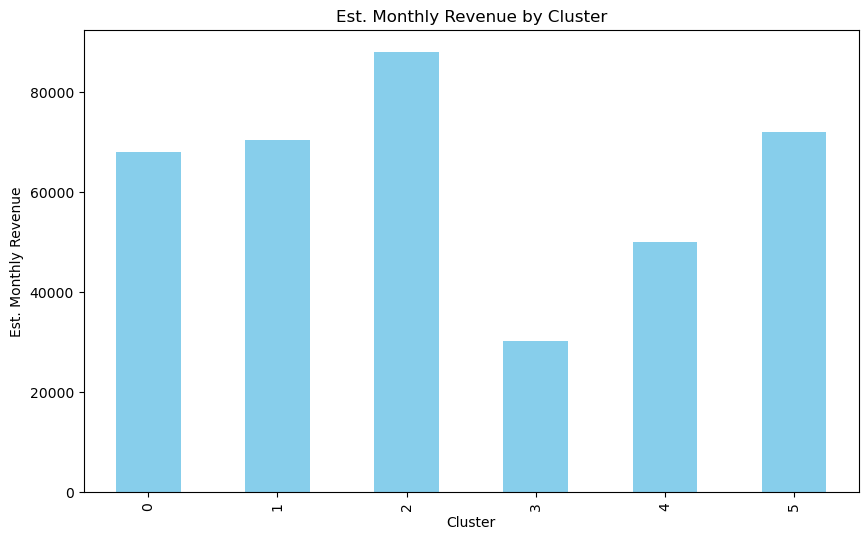

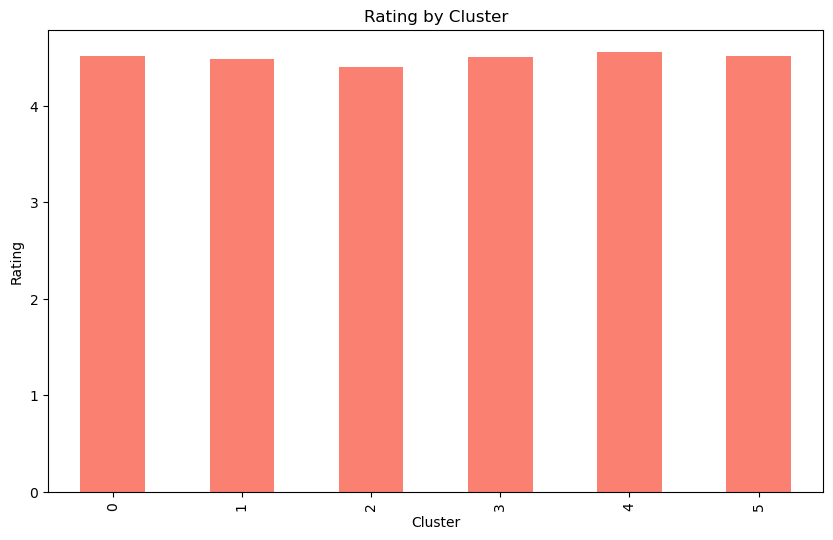

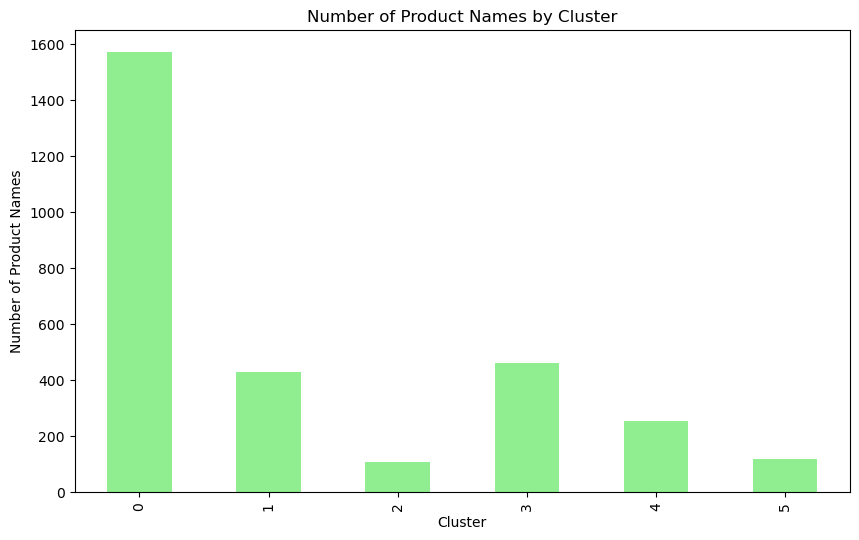

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Gráfico de barras para Est. Monthly Revenue por Cluster
cluster_summary_4['Est. Monthly Revenue'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Est. Monthly Revenue by Cluster')
plt.ylabel('Est. Monthly Revenue')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para Rating por Cluster
cluster_summary_4['Rating'].plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Rating by Cluster')
plt.ylabel('Rating')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para la cantidad de Product Names por Cluster
cluster_summary_4['Product Name'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Product Names by Cluster')
plt.ylabel('Number of Product Names')
plt.xlabel('Cluster')
plt.show()

### Nichos de Mercado

1. **Juguetes para Niños y Fiestas Infantiles**
   Este cluster se enfoca en juguetes y accesorios para niños, adecuados para diferentes edades y ocasiones, como fiestas infantiles y regalos de cumpleaños. Podría dirigirse a padres y organizadores de eventos que buscan entretenimiento y regalos para niños.

2. **Juguetes Educativos para Niños Pequeños**
   Este cluster incluye juguetes educativos diseñados para niños pequeños, como juegos de aprendizaje, juguetes Montessori y actividades sensoriales. Podría atraer a padres y cuidadores interesados en el desarrollo educativo de los niños.

3. **Vehículos de Control Remoto y Juguetes de Carreras**
   Este cluster se relaciona con vehículos de control remoto, como autos y camiones, así como juguetes de carreras. Podría dirigirse a entusiastas de la velocidad y la tecnología, especialmente niños y adolescentes.

4. **Juguetes Sensoriales y Antiestrés**
   Este cluster incluye juguetes diseñados para aliviar el estrés y la ansiedad, como los populares "pop it" y otros juguetes sensoriales. Podría atraer a personas de todas las edades que buscan formas de reducir el estrés y la tensión.

5. **Peluches y Muñecos de Peluche**
   Este cluster se enfoca en peluches y muñecos de peluche, incluyendo opciones suaves y adorables. Podría dirigirse a amantes de los peluches de todas las edades, especialmente aquellos que buscan compañeros de peluche.

6. **Juguetes de Construcción y Creatividad**
   Este cluster incluye juguetes de construcción, como bloques magnéticos y kits de construcción STEM. Podría atraer a padres y educadores interesados en fomentar la creatividad y el pensamiento lógico en los niños.



# Conclusiones

En este proyecto, se utilizaron cuatro datasets recolectados mediante web scraping para identificar nichos de mercado en la plataforma de ventas de Amazon. Cada dataset se centró en productos de diferentes categorías y tuvo como objetivo encontrar nichos rentables dentro de esas categorías.

En el primer dataset, que incluía productos de diversas categorías, se identificaron seis nichos rentables, como productos para bebés y niños, disfraces y accesorios para eventos especiales, bolsas y organizadores de almacenamiento, productos de cuidado personal y del hogar, calzado y zapatos, y productos de cama y descanso.

Luego, en los otros tres datasets, que se enfocaron en industrias específicas, se encontraron al menos cuatro nichos rentables en cada uno de ellos. Estos nichos incluyeron productos relacionados con el maquillaje y la belleza de ojos, espejos de maquillaje iluminados, herramientas y cepillos de maquillaje, maquillaje artístico y de fantasía, bolsos y organizadores de maquillaje de viaje, cuidado de la piel y productos de limpieza, productos para el descanso de mascotas, ropa y accesorios para mascotas en clima frío, equipamiento para paseo y control de mascotas, productos para la alimentación y cuidado de mascotas, fuentes de agua automáticas para mascotas, y arnés y accesorios para paseos de mascotas.

Estos nichos representan oportunidades de mercado en las áreas de juguetes, belleza, cuidado de mascotas y otras categorías específicas. Cada nicho tiene un público objetivo definido y ofrece la posibilidad de satisfacer sus necesidades y deseos específicos.

En resumen, el proyecto ha permitido identificar nichos rentables en diferentes categorías de productos, lo que puede ser útil para estrategias de marketing, desarrollo de productos y toma de decisiones comerciales para la venta de productos en linea. 